# Class Challenge: Image Classification of COVID-19 X-rays
# Task 2 [Total points: 30]

## Setup

* This assignment involves the following packages: 'matplotlib', 'numpy', and 'sklearn'. 

* If you are using conda, use the following commands to install the above packages:<br>
```shell
conda install matplotlib
conda install numpy
conda install -c anaconda scikit-learn
```

* If you are using pip, use use the following commands to install the above packages: <br> 
```shell
pip install matplotlib
pip install numpy
pip install sklearn
```

## Data

Please download the data using the following link: [COVID-19](https://drive.google.com/file/d/1Y88tgqpQ1Pjko_7rntcPowOJs_QNOrJ-/view). 

* After downloading 'Covid_Data_GradientCrescent.zip', unzip the file and you should see the following data structure:


|--all<br>
|--------train<br>
|--------test<br>
|--two<br>
|--------train<br>
|--------test<br>


* Put the 'all' folder, the 'two' folder and this python notebook in the **same directory** so that the following code can correctly locate the data.  



## [20 points] Multi-class Classification

In [1]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

os.environ['OMP_NUM_THREADS'] = '8'
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
tf.__version__

'2.1.0'

#### Load Image Data

In [2]:
DATA_LIST = os.listdir('all/train')
DATASET_PATH  = 'all/train'
TEST_DIR =  'all/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 10  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 100
LEARNING_RATE = 0.0001 # start off with high rate first 0.001 and experiment with reducing it gradually 

#### Generate Training and Validation Batches

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')


train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="categorical")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,class_mode="categorical")

/share/pkg.7/tensorflow/2.1.0/install/lib/SCC/../python3.6-gpu/site-packages/keras_preprocessing/image/image_data_generator.py:341: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 216 images belonging to 4 classes.
Found 54 images belonging to 4 classes.


#### [10 points] Build Model
Hint: Starting from a pre-trained model typically helps performance on a new task, e.g. starting with weights obtained by training on ImageNet. 

In [4]:
#raise NotImplementedError("Build your model based on an architecture of your choice "
#                          "A sample model summary is shown below")
# Architecture_1
model_1 = tf.keras.Sequential(name = "Architecture_1")
pre_trained_1 = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
pre_trained_1.trainable = False
model_1.add(pre_trained_1)
model_1.add(tf.keras.layers.GlobalAveragePooling2D(name="pooling"))
model_1.add(tf.keras.layers.Dense(512, activation='relu', name="dense_feature_1"))
model_1.add(tf.keras.layers.Dropout(0.25, name="dropout_1"))
model_1.add(tf.keras.layers.Dense(512, activation='relu', name="dense_feature_2"))
model_1.add(tf.keras.layers.Dropout(0.25, name="dropout_2"))
model_1.add(tf.keras.layers.Dense(4, activation='softmax', name="dense"))
model_1.summary()

Model: "Architecture_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
pooling (GlobalAveragePoolin (None, 512)               0         
_________________________________________________________________
dense_feature_1 (Dense)      (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_feature_2 (Dense)      (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 4)              

In [5]:
# Architecture_2

model_2 = tf.keras.Sequential(name = "Architecture_2")
pre_trained_2 = tf.keras.applications.VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
pre_trained_2.trainable = False
model_2.add(pre_trained_2)
model_2.add(tf.keras.layers.GlobalAveragePooling2D(name="pooling"))
model_2.add(tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001), 
                                  name="dense_feature_1"))
model_2.add(tf.keras.layers.Dropout(0.25, name="dropout_1"))
model_2.add(tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001), 
                                  name="dense_feature_2"))
model_2.add(tf.keras.layers.Dropout(0.25, name="dropout_2"))
model_2.add(tf.keras.layers.Dense(4, activation='softmax', name="dense"))
model_2.summary()

Model: "Architecture_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
pooling (GlobalAveragePoolin (None, 512)               0         
_________________________________________________________________
dense_feature_1 (Dense)      (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_feature_2 (Dense)      (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 4)              

In [6]:
# Architecture_3

model_3 = tf.keras.Sequential(name = "Architecture_3")
pre_trained_3 = tf.keras.applications.ResNet50(layers=tf.keras.layers, # necessary
                                               weights='imagenet', include_top=False, input_shape=(224, 224, 3))
pre_trained_3.trainable = False
model_3.add(pre_trained_3)
model_3.add(tf.keras.layers.BatchNormalization(name="BN"))
model_3.add(tf.keras.layers.GlobalAveragePooling2D(name="pooling"))
model_3.add(tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001), 
                                  name="dense_feature"))
model_3.add(tf.keras.layers.Dropout(0.5, name="dropout"))
model_3.add(tf.keras.layers.Dense(4, activation='softmax', name="dense"))
model_3.summary()

Model: "Architecture_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
BN (BatchNormalization)      (None, 7, 7, 2048)        8192      
_________________________________________________________________
pooling (GlobalAveragePoolin (None, 2048)              0         
_________________________________________________________________
dense_feature (Dense)        (None, 512)               1049088   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 2052      
Total params: 24,647,044
Trainable params: 1,055,236
Non-trainable params: 23,591,808
________________________________

#### [5 points] Train Model

In [7]:
#FIT MODEL
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

22
6


In [8]:
# raise NotImplementedError("Use the model.fit function to train your network")
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_1 = model_1.fit(train_batches, steps_per_epoch=STEP_SIZE_TRAIN, epochs=100, 
                      validation_data=valid_batches, validation_steps=STEP_SIZE_VALID)

/share/pkg.7/tensorflow/2.1.0/install/lib/SCC/../python3.6-gpu/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/share/pkg.7/tensorflow/2.1.0/install/lib/SCC/../python3.6-gpu/site-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 21 steps, validate for 5 steps
Epoch 1/100


/share/pkg.7/tensorflow/2.1.0/install/lib/SCC/../python3.6-gpu/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/share/pkg.7/tensorflow/2.1.0/install/lib/SCC/../python3.6-gpu/site-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


21/21 [==============================] - 11s 541ms/step - loss: 1.5350 - accuracy: 0.2718 - val_loss: 1.4279 - val_accuracy: 0.2400
Epoch 2/100
21/21 [==============================] - 5s 255ms/step - loss: 1.4140 - accuracy: 0.2767 - val_loss: 1.2980 - val_accuracy: 0.3800
Epoch 3/100
21/21 [==============================] - 5s 245ms/step - loss: 1.3486 - accuracy: 0.3592 - val_loss: 1.2355 - val_accuracy: 0.5000
Epoch 4/100
21/21 [==============================] - 5s 258ms/step - loss: 1.2056 - accuracy: 0.4369 - val_loss: 1.1426 - val_accuracy: 0.4800
Epoch 5/100
21/21 [==============================] - 5s 256ms/step - loss: 1.1671 - accuracy: 0.4272 - val_loss: 1.0461 - val_accuracy: 0.4600
Epoch 6/100
21/21 [==============================] - 6s 274ms/step - loss: 1.1178 - accuracy: 0.4762 - val_loss: 1.1838 - val_accuracy: 0.3800
Epoch 7/100
21/21 [==============================] - 6s 271ms/step - loss: 1.0136 - accuracy: 0.5485 - val_loss: 1.0057 - val_accuracy: 0.4400
Epoch 8/10

21/21 [==============================] - 5s 251ms/step - loss: 0.6406 - accuracy: 0.6990 - val_loss: 0.6980 - val_accuracy: 0.7200
Epoch 59/100
21/21 [==============================] - 5s 258ms/step - loss: 0.7060 - accuracy: 0.6650 - val_loss: 0.6750 - val_accuracy: 0.6600
Epoch 60/100
21/21 [==============================] - 5s 254ms/step - loss: 0.6445 - accuracy: 0.7087 - val_loss: 0.6722 - val_accuracy: 0.6200
Epoch 61/100
21/21 [==============================] - 5s 246ms/step - loss: 0.7011 - accuracy: 0.6748 - val_loss: 0.6690 - val_accuracy: 0.6200
Epoch 62/100
21/21 [==============================] - 5s 259ms/step - loss: 0.6749 - accuracy: 0.6942 - val_loss: 0.5674 - val_accuracy: 0.6800
Epoch 63/100
21/21 [==============================] - 5s 260ms/step - loss: 0.6901 - accuracy: 0.6571 - val_loss: 0.6573 - val_accuracy: 0.6400
Epoch 64/100
21/21 [==============================] - 5s 245ms/step - loss: 0.6381 - accuracy: 0.7184 - val_loss: 0.7577 - val_accuracy: 0.7600
Epoch

In [9]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_2 = model_2.fit(train_batches, steps_per_epoch=STEP_SIZE_TRAIN, epochs=100, 
                      validation_data=valid_batches, validation_steps=STEP_SIZE_VALID)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 21 steps, validate for 5 steps
Epoch 1/100


/share/pkg.7/tensorflow/2.1.0/install/lib/SCC/../python3.6-gpu/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/share/pkg.7/tensorflow/2.1.0/install/lib/SCC/../python3.6-gpu/site-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


21/21 [==============================] - 6s 304ms/step - loss: 2.4115 - accuracy: 0.2184 - val_loss: 2.0102 - val_accuracy: 0.4200
Epoch 2/100
21/21 [==============================] - 5s 257ms/step - loss: 1.8808 - accuracy: 0.3641 - val_loss: 1.7324 - val_accuracy: 0.3200
Epoch 3/100
21/21 [==============================] - 6s 266ms/step - loss: 1.7021 - accuracy: 0.3932 - val_loss: 1.5950 - val_accuracy: 0.5200
Epoch 4/100
21/21 [==============================] - 6s 277ms/step - loss: 1.5826 - accuracy: 0.4563 - val_loss: 1.5396 - val_accuracy: 0.4600
Epoch 5/100
21/21 [==============================] - 5s 258ms/step - loss: 1.4972 - accuracy: 0.4660 - val_loss: 1.4007 - val_accuracy: 0.3800
Epoch 6/100
21/21 [==============================] - 5s 259ms/step - loss: 1.3943 - accuracy: 0.5049 - val_loss: 1.3767 - val_accuracy: 0.4800
Epoch 7/100
21/21 [==============================] - 6s 267ms/step - loss: 1.4464 - accuracy: 0.4854 - val_loss: 1.2985 - val_accuracy: 0.4800
Epoch 8/100

21/21 [==============================] - 5s 258ms/step - loss: 1.0074 - accuracy: 0.6505 - val_loss: 1.0942 - val_accuracy: 0.4800
Epoch 59/100
21/21 [==============================] - 5s 261ms/step - loss: 0.9498 - accuracy: 0.6602 - val_loss: 0.7490 - val_accuracy: 0.7400
Epoch 60/100
21/21 [==============================] - 5s 257ms/step - loss: 0.8992 - accuracy: 0.6650 - val_loss: 0.7798 - val_accuracy: 0.6800
Epoch 61/100
21/21 [==============================] - 5s 260ms/step - loss: 0.9073 - accuracy: 0.6602 - val_loss: 0.7944 - val_accuracy: 0.6400
Epoch 62/100
21/21 [==============================] - 6s 265ms/step - loss: 0.9356 - accuracy: 0.6408 - val_loss: 0.9356 - val_accuracy: 0.6400
Epoch 63/100
21/21 [==============================] - 5s 260ms/step - loss: 0.8762 - accuracy: 0.6748 - val_loss: 0.7781 - val_accuracy: 0.6800
Epoch 64/100
21/21 [==============================] - 6s 263ms/step - loss: 0.9214 - accuracy: 0.6699 - val_loss: 0.8955 - val_accuracy: 0.6000
Epoch

In [10]:
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_3 = model_3.fit(train_batches, steps_per_epoch=STEP_SIZE_TRAIN, epochs=100, 
                      validation_data=valid_batches, validation_steps=STEP_SIZE_VALID)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 21 steps, validate for 5 steps
Epoch 1/100


/share/pkg.7/tensorflow/2.1.0/install/lib/SCC/../python3.6-gpu/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/share/pkg.7/tensorflow/2.1.0/install/lib/SCC/../python3.6-gpu/site-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


21/21 [==============================] - 9s 438ms/step - loss: 1.9388 - accuracy: 0.3592 - val_loss: 3.2672 - val_accuracy: 0.2600
Epoch 2/100
21/21 [==============================] - 5s 258ms/step - loss: 1.6358 - accuracy: 0.4466 - val_loss: 3.7937 - val_accuracy: 0.2600
Epoch 3/100
21/21 [==============================] - 5s 247ms/step - loss: 1.5908 - accuracy: 0.4272 - val_loss: 3.8354 - val_accuracy: 0.2600
Epoch 4/100
21/21 [==============================] - 5s 256ms/step - loss: 1.4963 - accuracy: 0.4078 - val_loss: 3.6570 - val_accuracy: 0.2600
Epoch 5/100
21/21 [==============================] - 5s 259ms/step - loss: 1.5072 - accuracy: 0.4660 - val_loss: 3.2558 - val_accuracy: 0.2600
Epoch 6/100
21/21 [==============================] - 5s 257ms/step - loss: 1.4639 - accuracy: 0.4126 - val_loss: 2.7126 - val_accuracy: 0.2600
Epoch 7/100
21/21 [==============================] - 5s 261ms/step - loss: 1.4215 - accuracy: 0.4857 - val_loss: 2.3783 - val_accuracy: 0.2600
Epoch 8/100

21/21 [==============================] - 5s 256ms/step - loss: 1.2320 - accuracy: 0.5194 - val_loss: 1.2288 - val_accuracy: 0.4200
Epoch 59/100
21/21 [==============================] - 5s 257ms/step - loss: 1.2507 - accuracy: 0.4903 - val_loss: 0.9715 - val_accuracy: 0.6000
Epoch 60/100
21/21 [==============================] - 5s 257ms/step - loss: 1.1722 - accuracy: 0.5437 - val_loss: 1.1205 - val_accuracy: 0.4800
Epoch 61/100
21/21 [==============================] - 5s 259ms/step - loss: 1.2487 - accuracy: 0.5291 - val_loss: 1.1467 - val_accuracy: 0.5200
Epoch 62/100
21/21 [==============================] - 5s 259ms/step - loss: 1.2361 - accuracy: 0.5437 - val_loss: 1.1807 - val_accuracy: 0.5600
Epoch 63/100
21/21 [==============================] - 5s 245ms/step - loss: 1.2282 - accuracy: 0.4951 - val_loss: 1.1616 - val_accuracy: 0.4400
Epoch 64/100
21/21 [==============================] - 5s 254ms/step - loss: 1.2278 - accuracy: 0.5437 - val_loss: 1.2157 - val_accuracy: 0.5800
Epoch

#### [5 points] Plot Accuracy and Loss During Training

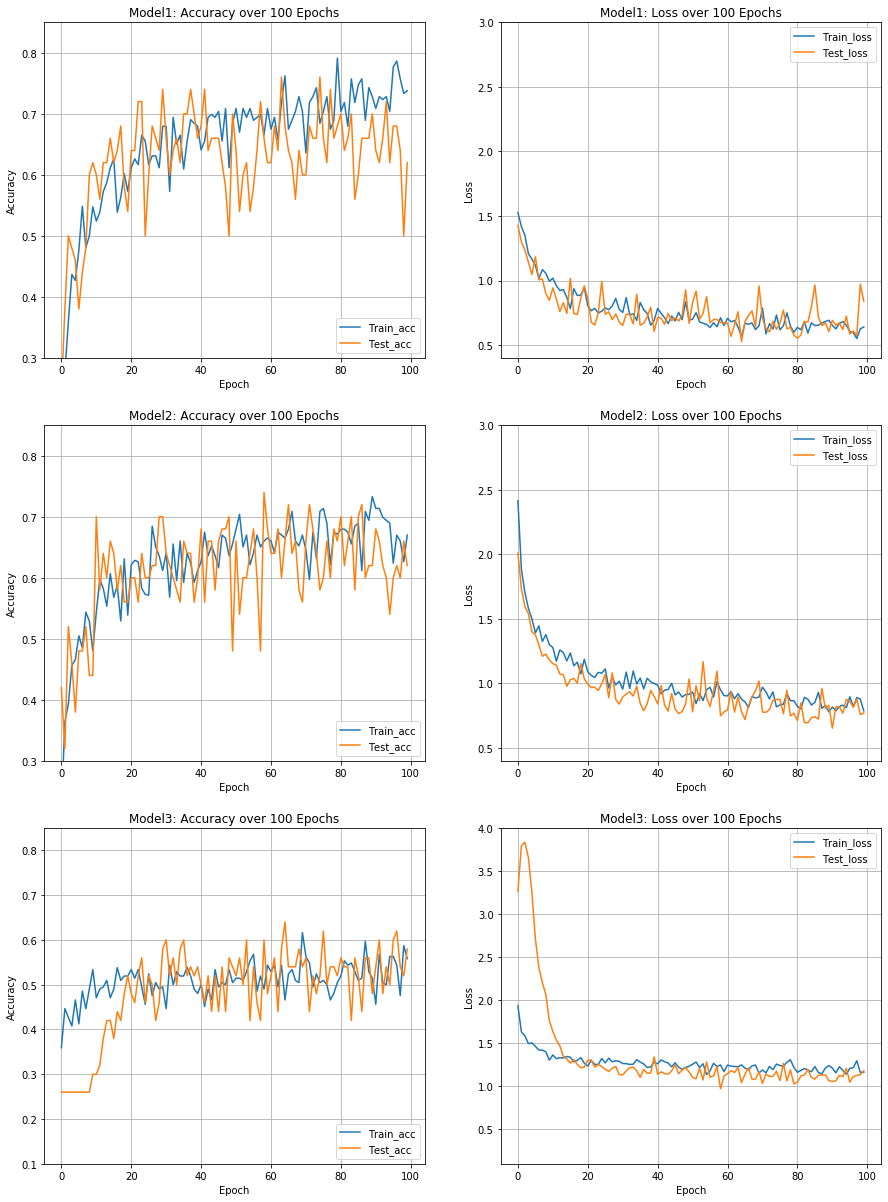

In [11]:
import matplotlib.pyplot as plt

# raise NotImplementedError("Plot the accuracy and the loss during training")
# model_1
plt.figure(figsize=(15, 21)) 
plt.subplot(321)
plt.plot(history_1.history['accuracy'], label='Train_acc')
plt.plot(history_1.history['val_accuracy'], label='Test_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.30, 0.85])
plt.title('Model1: Accuracy over 100 Epochs')
plt.legend(loc='lower right')
plt.grid()

plt.subplot(322)
plt.plot(history_1.history['loss'], label='Train_loss')
plt.plot(history_1.history['val_loss'], label='Test_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.4, 3])
plt.title('Model1: Loss over 100 Epochs')
plt.legend(loc='upper right')
plt.grid()

# model_2
plt.subplot(323)
plt.plot(history_2.history['accuracy'], label='Train_acc')
plt.plot(history_2.history['val_accuracy'], label='Test_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.30, 0.85])
plt.title('Model2: Accuracy over 100 Epochs')
plt.legend(loc='lower right')
plt.grid()

plt.subplot(324)
plt.plot(history_2.history['loss'], label='Train_loss')
plt.plot(history_2.history['val_loss'], label='Test_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.4, 3])
plt.title('Model2: Loss over 100 Epochs')
plt.legend(loc='upper right')
plt.grid()

# model_3
plt.subplot(325)
plt.plot(history_3.history['accuracy'], label='Train_acc')
plt.plot(history_3.history['val_accuracy'], label='Test_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.10, 0.85])
plt.title('Model3: Accuracy over 100 Epochs')
plt.legend(loc='lower right')
plt.grid()

plt.subplot(326)
plt.plot(history_3.history['loss'], label='Train_loss')
plt.plot(history_3.history['val_loss'], label='Test_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.1, 4.0])
plt.title('Model3: Loss over 100 Epochs')
plt.legend(loc='upper right')
plt.grid()

#### Testing Model

In [12]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator_1 = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="categorical")
eval_generator_1.reset()
print(len(eval_generator_1))
x_1 = model_1.evaluate_generator(eval_generator_1,steps = np.ceil(len(eval_generator_1)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print('Test loss:' , x_1[0])
print('Test accuracy:',x_1[1])

Found 36 images belonging to 4 classes.
36
Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']
36/36 [==============================] - 1s 40ms/step - loss: 1.1318 - accuracy: 0.6667
Test loss: 1.131812276049762
Test accuracy: 0.6666667


In [13]:
eval_generator_2 = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="categorical")
eval_generator_2.reset()
print(len(eval_generator_2))
x_2 = model_2.evaluate_generator(eval_generator_2,steps = np.ceil(len(eval_generator_2)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print('Test loss:' , x_2[0])
print('Test accuracy:',x_2[1])

Found 36 images belonging to 4 classes.
36
  ...
    to  
  ['...']
36/36 [==============================] - 1s 15ms/step - loss: 1.4622 - accuracy: 0.4722
Test loss: 1.4621895717249975
Test accuracy: 0.4722222


In [14]:
eval_generator_3 = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="categorical")
eval_generator_3.reset()
print(len(eval_generator_3))
x_3 = model_3.evaluate_generator(eval_generator_3,steps = np.ceil(len(eval_generator_3)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print('Test loss:' , x_3[0])
print('Test accuracy:',x_3[1])

Found 36 images belonging to 4 classes.
36
  ...
    to  
  ['...']
36/36 [==============================] - 1s 21ms/step - loss: 1.6571 - accuracy: 0.3056
Test loss: 1.6571431540780597
Test accuracy: 0.30555555


## [10 points] TSNE Plot
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a widely used technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. After training is complete, extract features from a specific deep layer of your choice, use t-SNE to reduce the dimensionality of your extracted features to 2 dimensions and plot the resulting 2D features.

Found 270 images belonging to 4 classes.


Text(0.5, 1.0, 'model 1')

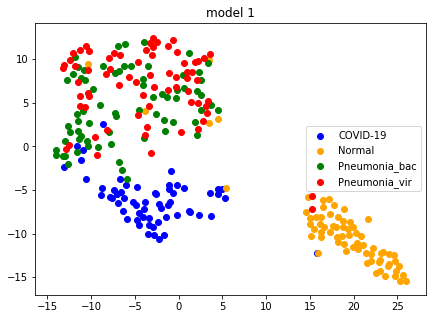

In [18]:
from sklearn.manifold import TSNE
import tensorflow.keras.models as models

intermediate_layer_model_1 = models.Model(inputs=model_1.input,
                                        outputs=model_1.get_layer('dense_feature_2').output)

tsne_eval_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="categorical")

#raise NotImplementedError("Extract features from the tsne_data_generator and fit a t-SNE model for the features,"
#                          "and plot the resulting 2D features of the four classes.")

hidden_features = intermediate_layer_model_1.predict(tsne_eval_generator)
RES_TSNE = TSNE(n_components=2).fit_transform(hidden_features)
Classes = tsne_eval_generator.classes
Class1 = np.array( [RES_TSNE[i] for i in range(len(RES_TSNE)) if Classes[i] == 0] )
Class2 = np.array( [RES_TSNE[i] for i in range(len(RES_TSNE)) if Classes[i] == 1] )
Class3 = np.array( [RES_TSNE[i] for i in range(len(RES_TSNE)) if Classes[i] == 2] )
Class4 = np.array( [RES_TSNE[i] for i in range(len(RES_TSNE)) if Classes[i] == 3] )
plt.figure(figsize=(7, 5)) 
plt.scatter(Class1[:, 0], Class1[:, 1], label='COVID-19', c='blue')
plt.scatter(Class2[:, 0], Class2[:, 1], label='Normal', c='orange')
plt.scatter(Class3[:, 0], Class3[:, 1], label='Pneumonia_bac', c='green')
plt.scatter(Class4[:, 0], Class4[:, 1], label='Pneumonia_vir', c='red')
plt.legend(loc='center right')
plt.title('model 1')

Text(0.5, 1.0, 'model 2')

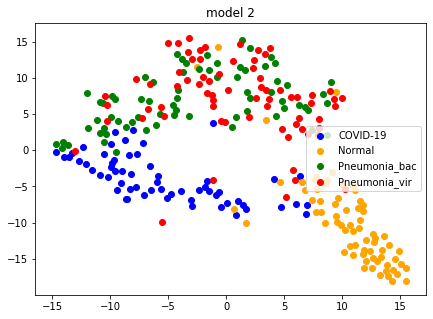

In [19]:
intermediate_layer_model_2 = models.Model(inputs=model_2.input,
                                        outputs=model_2.get_layer('dense_feature_2').output)

hidden_features = intermediate_layer_model_2.predict(tsne_eval_generator)
RES_TSNE = TSNE(n_components=2).fit_transform(hidden_features)
Classes = tsne_eval_generator.classes
Class1 = np.array( [RES_TSNE[i] for i in range(len(RES_TSNE)) if Classes[i] == 0] )
Class2 = np.array( [RES_TSNE[i] for i in range(len(RES_TSNE)) if Classes[i] == 1] )
Class3 = np.array( [RES_TSNE[i] for i in range(len(RES_TSNE)) if Classes[i] == 2] )
Class4 = np.array( [RES_TSNE[i] for i in range(len(RES_TSNE)) if Classes[i] == 3] )
plt.figure(figsize=(7, 5)) 
plt.scatter(Class1[:, 0], Class1[:, 1], label='COVID-19', c='blue')
plt.scatter(Class2[:, 0], Class2[:, 1], label='Normal', c='orange')
plt.scatter(Class3[:, 0], Class3[:, 1], label='Pneumonia_bac', c='green')
plt.scatter(Class4[:, 0], Class4[:, 1], label='Pneumonia_vir', c='red')
plt.legend(loc='center right')
plt.title('model 2')

Text(0.5, 1.0, 'model 3')

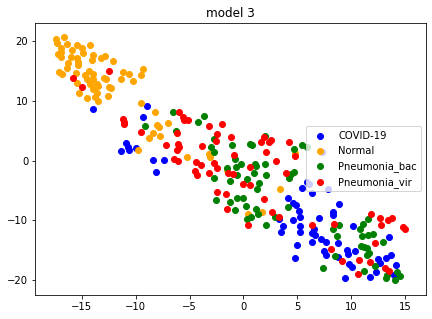

In [20]:
intermediate_layer_model_3 = models.Model(inputs=model_3.input,
                                        outputs=model_3.get_layer('dense_feature').output)

hidden_features = intermediate_layer_model_3.predict(tsne_eval_generator)
RES_TSNE = TSNE(n_components=2).fit_transform(hidden_features)
Classes = tsne_eval_generator.classes
Class1 = np.array( [RES_TSNE[i] for i in range(len(RES_TSNE)) if Classes[i] == 0] )
Class2 = np.array( [RES_TSNE[i] for i in range(len(RES_TSNE)) if Classes[i] == 1] )
Class3 = np.array( [RES_TSNE[i] for i in range(len(RES_TSNE)) if Classes[i] == 2] )
Class4 = np.array( [RES_TSNE[i] for i in range(len(RES_TSNE)) if Classes[i] == 3] )
plt.figure(figsize=(7, 5)) 
plt.scatter(Class1[:, 0], Class1[:, 1], label='COVID-19', c='blue')
plt.scatter(Class2[:, 0], Class2[:, 1], label='Normal', c='orange')
plt.scatter(Class3[:, 0], Class3[:, 1], label='Pneumonia_bac', c='green')
plt.scatter(Class4[:, 0], Class4[:, 1], label='Pneumonia_vir', c='red')
plt.legend(loc='center right')
plt.title('model 3')

<!-- ## Task 2: COVID-19 vs Normal vs Tertiary Pneumonia (Bacterial and Viral) -->

<!-- #### Renew Training Batch and Validation Batch -->

<!-- #### Renew Model -->